In [8]:
import scipy.stats as sp
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

In [12]:
# 예제 7-1
p = 1/3
rv = sp.bernoulli(p)

# 확률질량함수 pmf
print(f"f(P=0) = {rv.pmf(0)}")
print(f"f(P=1) = {rv.pmf(1)}")

# 누적분포함수 cdf
print(f"F(P<2) = {rv.cdf(1)}")

f(P=0) = 0.6666666666666667
f(P=1) = 0.3333333333333333
F(P<2) = 1.0


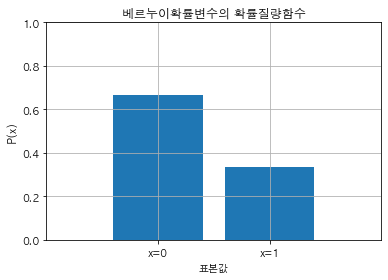

In [9]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0','x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

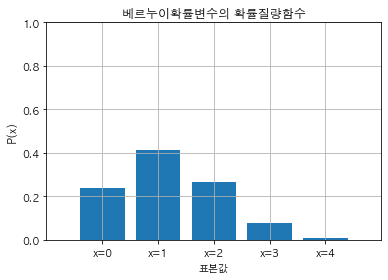

X의 평균: 1.2
X의 분산: 0.84


In [18]:
# 7-2
p, n = 0.3, 4
rv = sp.binom(n, p)
xx = [0,1,2,3,4]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 5)
plt.ylim(0, 1)
plt.xticks(xx, ['x=0','x=1', 'x=2', 'x=3', 'x=4'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이확률변수의 확률질량함수')
plt.grid()
plt.show()

print(f"X의 평균: {p*n}")
print(f"X의 분산: {p*(1-p)*n}")

In [24]:
# 예제 7-2
p = 1/4
n = 5
rv = sp.binom(n, p)

#1. P(X <= 1)
print(f"P(X<=1) = {rv.cdf(1)}")

P(X<=1) = 0.6328125


In [22]:
# 1. P(X<=1)
print(f"P(X<=1) = {round(rv.cdf(1), 4)}")
# 2. P(X=2)
print(f"P(X=2) = {round(rv.pmf(2), 4)}")
# 3. P(X<3)
print(f"P(X<3) = {round(rv.cdf(2), 4)}")
# 4. P(X>3)
print(f"P(X>3) = {1-round(rv.cdf(2), 4)}")

P(X<=1) = 0.6517
P(X=2) = 0.2646
P(X<3) = 0.9163
P(X>3) = 0.0837


In [39]:
# 표준정규분포
rv = sp.norm(0, 1)

print(f"a : {1 - rv.cdf(1.45)}")
print(f"b : {rv.cdf(2.58) - 0.5}")
print(f"c : {1 - rv.cdf(2.04)}")
print(f"d : {rv.cdf(1.37) - 0.5}")
print(f"e : {2 * (rv.cdf(1.69) - 0.5)}")
print(f"f : {2*(1-rv.cdf(2.79))}")



a : 0.0735292596096484
b : 0.4950599842422293
c : 0.020675162866070074
d : 0.41465654917803296
e : 0.9089720453569003
f : 0.005270804155809827


In [47]:
m, std = 75, 5
rv = sp.norm(m, std)

print(f"a : {rv.cdf(64)}")
print(f"b : {rv.cdf(82) - rv.cdf(68)}")
print(f"c : {1 - rv.cdf(87.5)}")



a : 0.013903447513498595
b : 0.8384866815324579
c : 0.006209665325776159
a : 0.8961653188787
b : 0.8961653188787


In [48]:
m, std = 140, 5
rv = sp.norm(m, std)
print(f"a : {rv.cdf(146.3)}")
print(f"b : {1 - rv.cdf(133.7)}")


a : 0.8961653188787
b : 0.8961653188787


In [51]:
# 이항분포의 정규근사 
import numpy as np

# X ~ B(n, p)
# mu = n*p , std **2 = n * p * (1-p)

n, p, q = 100, 1/5, 4/5
a, b = 14, 25

m = n*p
std = np.sqrt(n*p*q)
rv = sp.norm(m, std)
print(rv.cdf(b) - rv.cdf(a))

0.8275430250642866


In [76]:
# 7-12
n, p, q = 100, 0.4, 0.6
m = n*p
std = np.sqrt(n*p*q)

rv1 = sp.norm(loc = m, scale = std)
rv2 = sp.norm(0, 1)
print(rv1.cdf(47.5))
print(rv2.cdf(1.53))
print(rv1.cdf(45) - rv1.cdf(35))


0.93710678768053
0.9369916355360216
0.6925658340726046


In [60]:
# 7-11
n, p, q = 720, 0.12, 0.88
a,b = 105, 145
m = n*p
std = np.sqrt(n*p*q)

rv = sp.norm(loc = m, scale = std)
b = rv.cdf(b) - rv.cdf(a)
b


0.016457552675704035

In [73]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
n, p, q = 720, 0.12, 0.88
a,b = 105, 145
import scipy.integrate as integrate
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 *np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2*sigma**2))
    return x_range, f

def get_prob(X, a, b):
    x_range, f = X
    
    prob_sum = np.round(integrate.quad(f, a, b), 4)
    
    print(f'확률: {prob_sum[0]}')

X=N(n*p, np.sqrt(n*p*q))
get_prob(X,a,b)

확률: 0.0165


In [74]:
n, p, q = 100, 0.4, 0.6
a, b = 35, 45
X=N(n*p, np.sqrt(n*p*q))
get_prob(X,a,b)

확률: 0.6926
